In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
#save all the csv and then merge
df1 = pd.read_csv('transactions_1.csv')
df2 = pd.read_csv('NewCustList_2.csv')
df3 = pd.read_csv('CustDemo_3.csv')
df4 = pd.read_csv('CustAddr_4.csv')

In [3]:
#merging all files using customer id
df13 = pd.merge(df1,df3, on= ['customer_id'])
df134 = pd.merge(df13, df4, on= ['customer_id'])

In [4]:
#Dropping NA Values
df134_cleaned = df134.dropna()

In [5]:
#Dropping Duplicates
df134_cleaned = df134_cleaned.drop_duplicates()

In [6]:
df134_cleaned['transaction_date'] = pd.to_datetime(df134_cleaned['transaction_date'])
df134_cleaned.set_index('transaction_date', inplace=True)

In [7]:
df = df134_cleaned.sort_values(by=['customer_id']).reset_index()

In [8]:
print('transaction_date' in df.columns)

True


In [9]:
df

,transaction_date,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,2017-06-04,15663,32,1,True,Approved,Giant Bicycles,Standard,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
1,2017-03-29,18970,11,1,True,Approved,Giant Bicycles,Standard,high,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
2,2017-12-09,16423,9,1,True,Approved,OHM Cycles,Road,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
3,2017-03-27,14486,23,1,False,Approved,Norco Bicycles,Mountain,low,small,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
4,2017-05-19,13644,25,1,False,Approved,Giant Bicycles,Road,medium,medium,...,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16190,2017-04-18,3479,73,3496,True,Approved,Solex,Standard,medium,medium,...,Manufacturing,Mass Customer,N,Yes,19.0,2565 Caliangt Point,2171,NSW,Australia,9
16191,2017-04-15,9232,29,3496,True,Approved,Norco Bicycles,Road,medium,medium,...,Manufacturing,Mass Customer,N,Yes,19.0,2565 Caliangt Point,2171,NSW,Australia,9
16192,2017-09-01,8276,18,3497,True,Approved,Solex,Standard,medium,medium,...,Manufacturing,Affluent Customer,N,Yes,18.0,96 Delladonna Trail,3976,VIC,Australia,5
16193,2017-09-12,10493,78,3497,False,Approved,Giant Bicycles,Standard,medium,large,...,Manufacturing,Affluent Customer,N,Yes,18.0,96 Delladonna Trail,3976,VIC,Australia,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16195 entries, 0 to 16194
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_date                     16195 non-null  datetime64[ns]
 1   transaction_id                       16195 non-null  int64         
 2   product_id                           16195 non-null  int64         
 3   customer_id                          16195 non-null  int64         
 4   online_order                         16195 non-null  object        
 5   order_status                         16195 non-null  object        
 6   brand                                16195 non-null  object        
 7   product_line                         16195 non-null  object        
 8   product_class                        16195 non-null  object        
 9   product_size                         16195 non-null  object        
 10  list_price

In [11]:
df.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost,product_first_sold_date,past_3_years_bike_related_purchases,tenure,postcode,property_valuation
count,16195.000000,16195.000000,16195.000000,16195.000000,16195.000000,16195.000000,16195.000000,16195.000000,16195.000000,16195.000000
mean,9986.826304,45.657240,1722.865205,1109.457308,556.634376,38216.740969,49.567089,10.689102,2991.033776,7.517444
std,5772.836274,30.502745,1005.957770,582.885506,406.352121,2875.416058,28.716642,5.660050,853.329379,2.820139
min,1.000000,0.000000,1.000000,12.010000,7.210000,33259.000000,0.000000,1.000000,2000.000000,1.000000
25%,4993.500000,18.000000,848.000000,575.270000,215.140000,35667.000000,25.000000,6.000000,2200.000000,6.000000
50%,9957.000000,45.000000,1729.000000,1163.890000,507.580000,38216.000000,49.000000,11.000000,2768.000000,8.000000
75%,14984.500000,72.000000,2585.000000,1635.300000,795.100000,40725.500000,74.000000,15.000000,3756.000000,10.000000
max,20000.000000,100.000000,3497.000000,2091.470000,1759.850000,42710.000000,99.000000,22.000000,4883.000000,12.000000


In [12]:
#check duplicated values in df
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

transaction_date                       0
transaction_id                         0
product_id                             0
customer_id                            0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address         

In [14]:
#filling null values using ffill
df['last_name'].fillna(method='ffill', inplace = True)

In [15]:
#filling null values using ffill
df['DOB'].fillna(method='ffill', inplace = True)

In [16]:
df.isnull().sum()

transaction_date                       0
transaction_id                         0
product_id                             0
customer_id                            0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address         

In [17]:
df['DOB'] = df['DOB'].apply(pd.to_datetime)

In [18]:
#adding an age column 
ref_date = dt.datetime.now()
df['Age'] = df['DOB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))

In [19]:
#removing outliers of age
df = df[df['Age']<100]

In [20]:
df['transaction_month'] = pd.DatetimeIndex(df['transaction_date']).month

C:\Users\srava\AppData\Local\Temp\ipykernel_27924\753386093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction_month'] = pd.DatetimeIndex(df['transaction_date']).month


In [21]:
# calculating Profits
df['profit'] = df['list_price'] - df['standard_cost']

C:\Users\srava\AppData\Local\Temp\ipykernel_27924\3948600086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit'] = df['list_price'] - df['standard_cost']


In [22]:
df.head()

,transaction_date,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,...,owns_car,tenure,address,postcode,state,country,property_valuation,Age,transaction_month,profit
0,2017-06-04,15663,32,1,True,Approved,Giant Bicycles,Standard,medium,medium,...,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,70,6,431.33
1,2017-03-29,18970,11,1,True,Approved,Giant Bicycles,Standard,high,medium,...,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,70,3,509.97
2,2017-12-09,16423,9,1,True,Approved,OHM Cycles,Road,medium,medium,...,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,70,12,75.14
3,2017-03-27,14486,23,1,False,Approved,Norco Bicycles,Mountain,low,small,...,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,70,3,75.75
4,2017-05-19,13644,25,1,False,Approved,Giant Bicycles,Road,medium,medium,...,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,70,5,709.34


In [23]:
df.tail()

,transaction_date,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,...,owns_car,tenure,address,postcode,state,country,property_valuation,Age,transaction_month,profit
16190,2017-04-18,3479,73,3496,True,Approved,Solex,Standard,medium,medium,...,Yes,19.0,2565 Caliangt Point,2171,NSW,Australia,9,37,4,1612.25
16191,2017-04-15,9232,29,3496,True,Approved,Norco Bicycles,Road,medium,medium,...,Yes,19.0,2565 Caliangt Point,2171,NSW,Australia,9,37,4,135.85
16192,2017-09-01,8276,18,3497,True,Approved,Solex,Standard,medium,medium,...,Yes,18.0,96 Delladonna Trail,3976,VIC,Australia,5,37,9,143.82
16193,2017-09-12,10493,78,3497,False,Approved,Giant Bicycles,Standard,medium,large,...,Yes,18.0,96 Delladonna Trail,3976,VIC,Australia,5,37,9,1055.82
16194,2017-11-08,6926,1,3497,True,Approved,Giant Bicycles,Standard,medium,medium,...,Yes,18.0,96 Delladonna Trail,3976,VIC,Australia,5,37,11,448.68


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16187 entries, 0 to 16194
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_date                     16187 non-null  datetime64[ns]
 1   transaction_id                       16187 non-null  int64         
 2   product_id                           16187 non-null  int64         
 3   customer_id                          16187 non-null  int64         
 4   online_order                         16187 non-null  object        
 5   order_status                         16187 non-null  object        
 6   brand                                16187 non-null  object        
 7   product_line                         16187 non-null  object        
 8   product_class                        16187 non-null  object        
 9   product_size                         16187 non-null  object        
 10  list_price

In [25]:
#print the final file to excel ready to be used as a data source for dashboard
df.to_excel('./Current_data.xlsx', sheet_name='current_data', index=False)

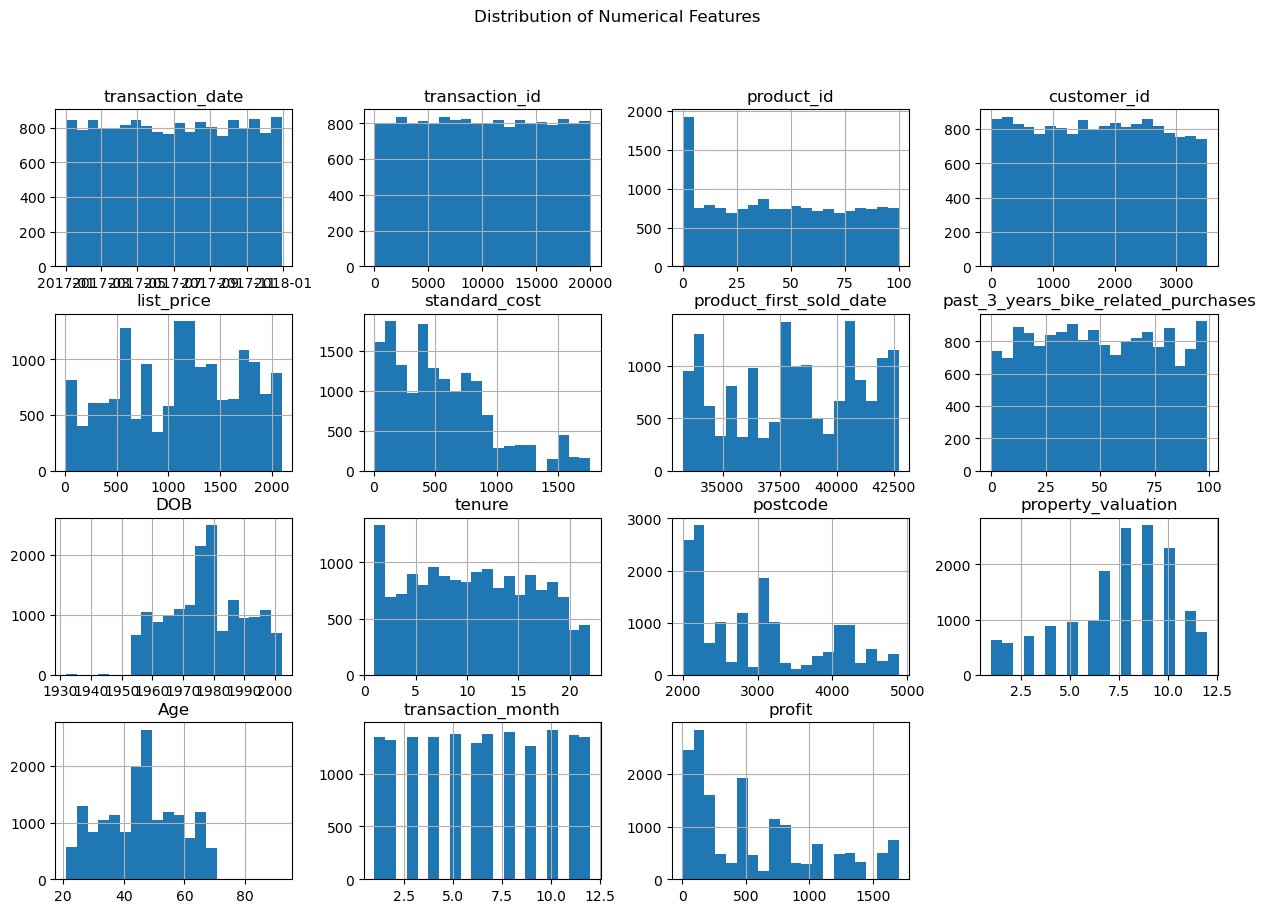

In [26]:
# Univariate Analysis
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

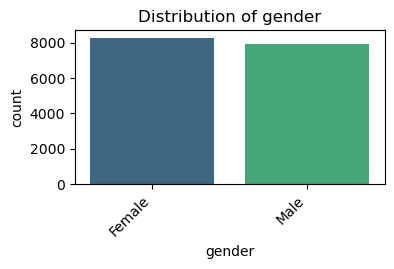

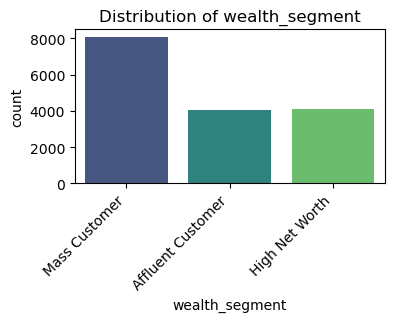

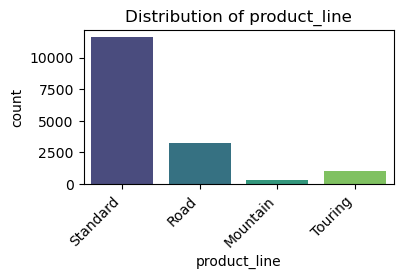

In [27]:
categorical_features = ['gender', 'wealth_segment', 'product_line']
for feature in categorical_features:
    plt.figure(figsize=(4, 2))
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

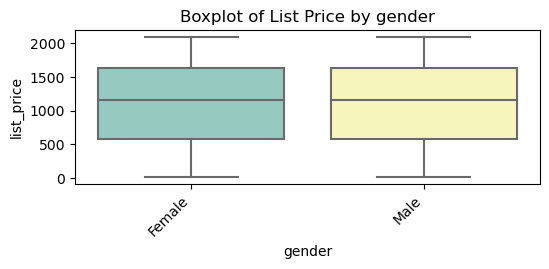

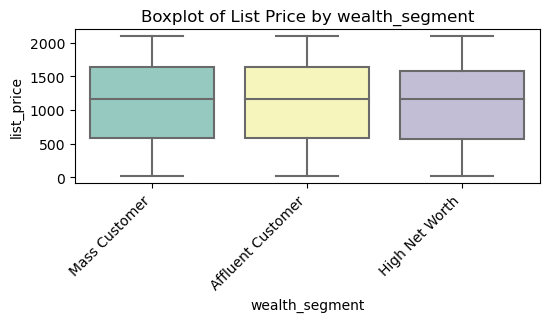

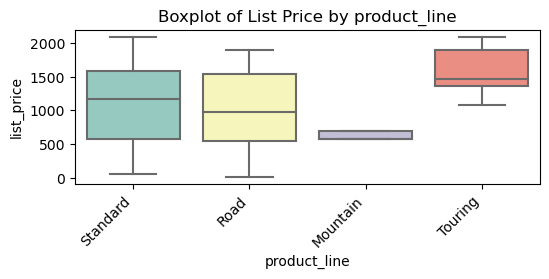

In [28]:
for feature in categorical_features:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=feature, y='list_price', data=df, palette='Set3')
    plt.title(f'Boxplot of List Price by {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

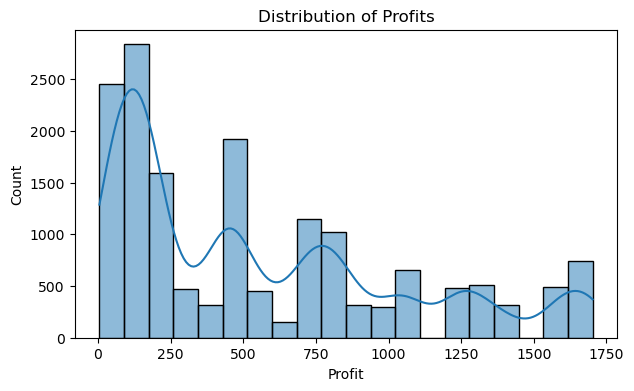

In [29]:
plt.figure(figsize=(7, 4))
sns.histplot(df['profit'], bins=20, kde=True)
plt.title('Distribution of Profits')
plt.xlabel('Profit')
plt.show()

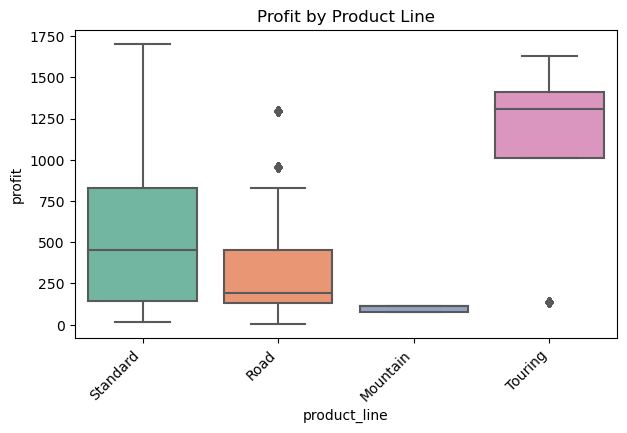

In [30]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='product_line', y='profit', data=df, palette='Set2')
plt.title('Profit by Product Line')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\srava\AppData\Local\Temp\ipykernel_27924\1031395350.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


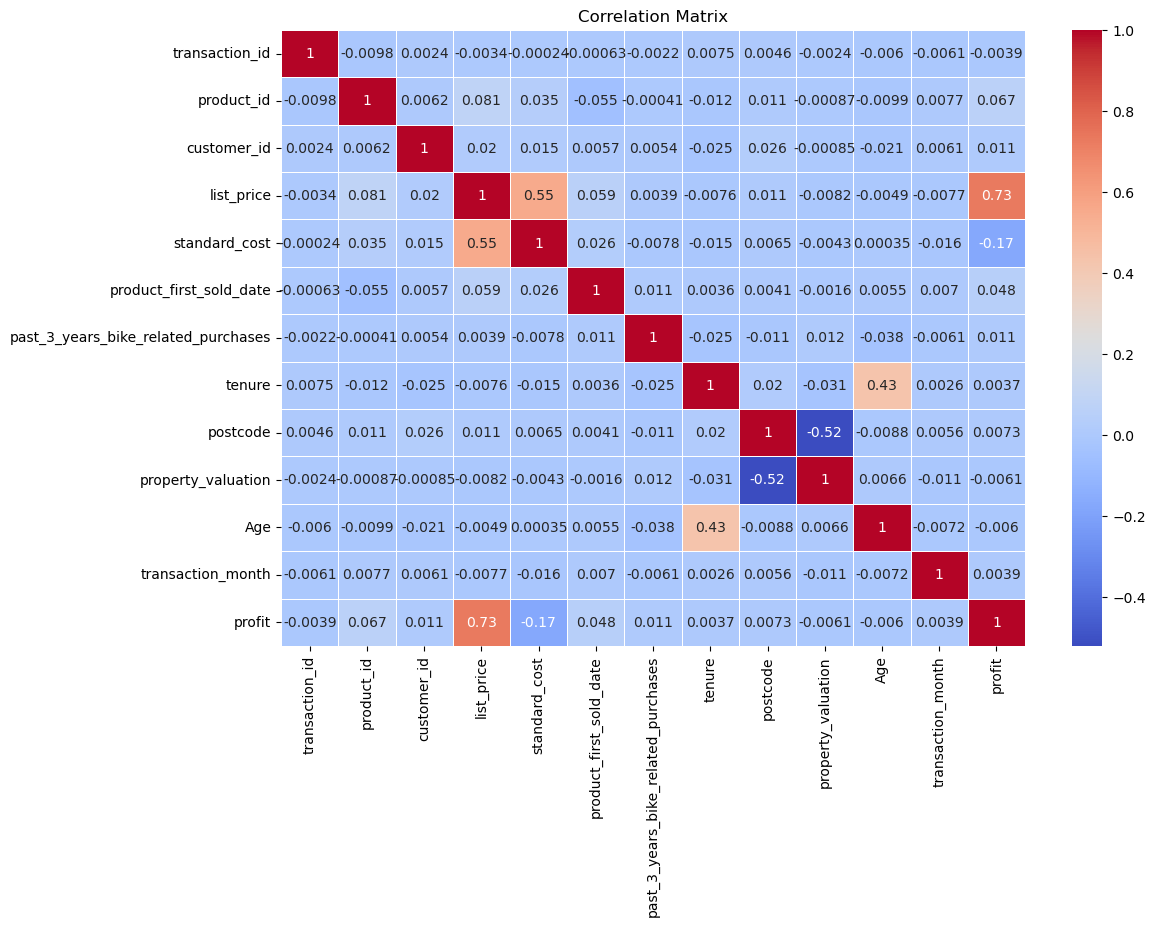

In [31]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

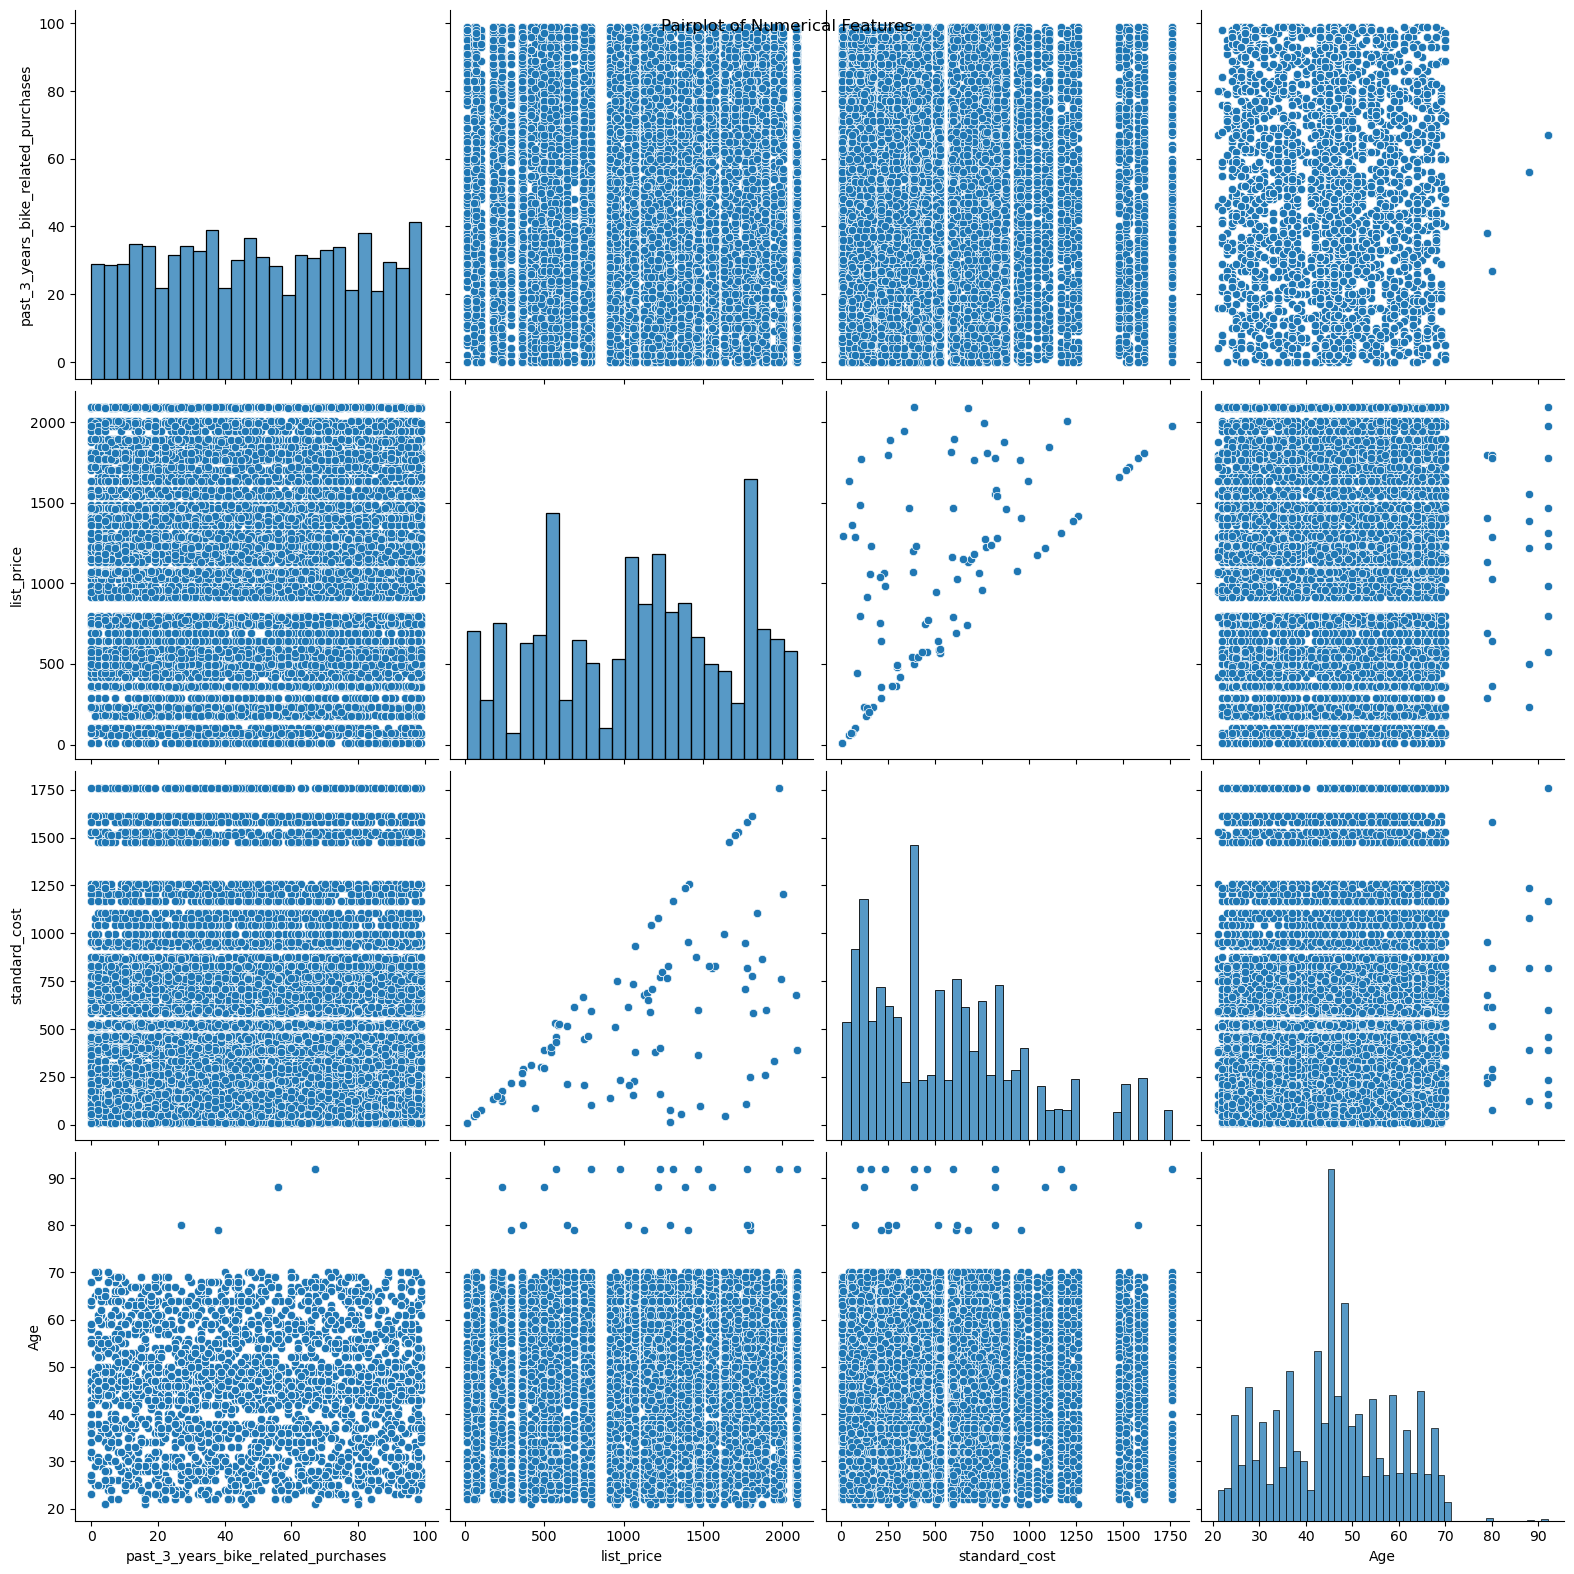

In [32]:
numerical_features = ['past_3_years_bike_related_purchases', 'list_price', 'standard_cost', 'Age']
sns.pairplot(df[numerical_features], height=4)
plt.suptitle('Pairplot of Numerical Features')
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16187 entries, 0 to 16194
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_date                     16187 non-null  datetime64[ns]
 1   transaction_id                       16187 non-null  int64         
 2   product_id                           16187 non-null  int64         
 3   customer_id                          16187 non-null  int64         
 4   online_order                         16187 non-null  object        
 5   order_status                         16187 non-null  object        
 6   brand                                16187 non-null  object        
 7   product_line                         16187 non-null  object        
 8   product_class                        16187 non-null  object        
 9   product_size                         16187 non-null  object        
 10  list_price

C:\Users\srava\AppData\Local\Temp\ipykernel_27924\3893773790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = (pd.to_datetime('today') - pd.to_datetime(df['DOB'])).astype('<m8[Y]')


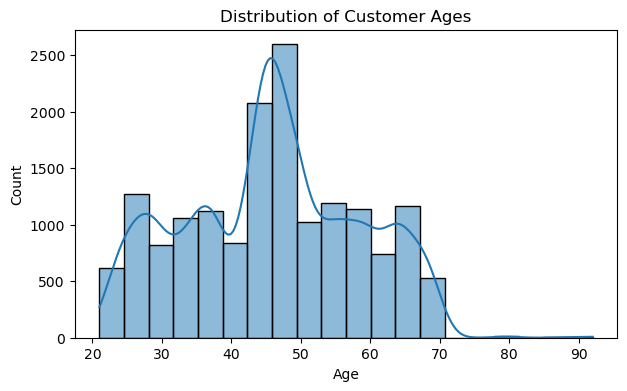

In [34]:
# Feature Engineering
df['Age'] = (pd.to_datetime('today') - pd.to_datetime(df['DOB'])).astype('<m8[Y]')
plt.figure(figsize=(7, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.show()

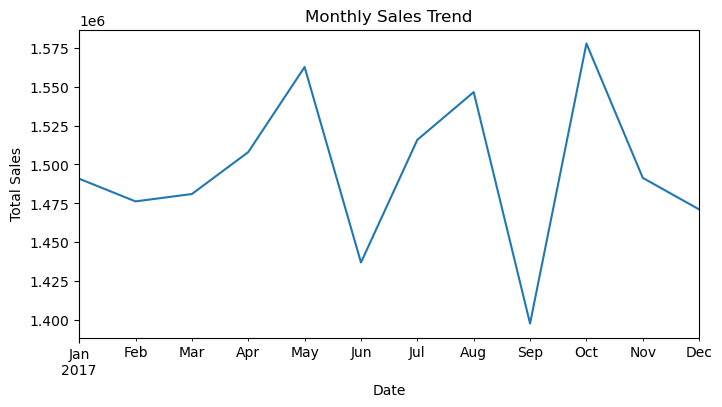

In [35]:
df.set_index('transaction_date', inplace=True)
monthly_sales = df['list_price'].resample('M').sum()
plt.figure(figsize=(8, 4))
monthly_sales.plot(title='Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

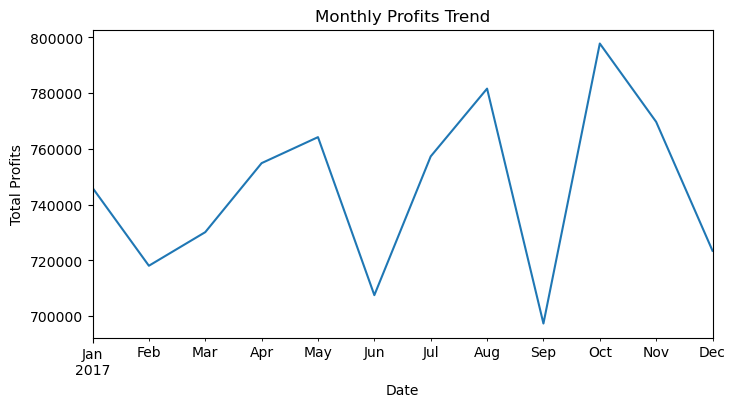

In [36]:
# Resample data by month and visualize trends
monthly_profits = df['profit'].resample('M').sum()
plt.figure(figsize=(8, 4))

monthly_profits.plot(title='Monthly Profits Trend')
plt.xlabel('Date')
plt.ylabel('Total Profits')
plt.show()

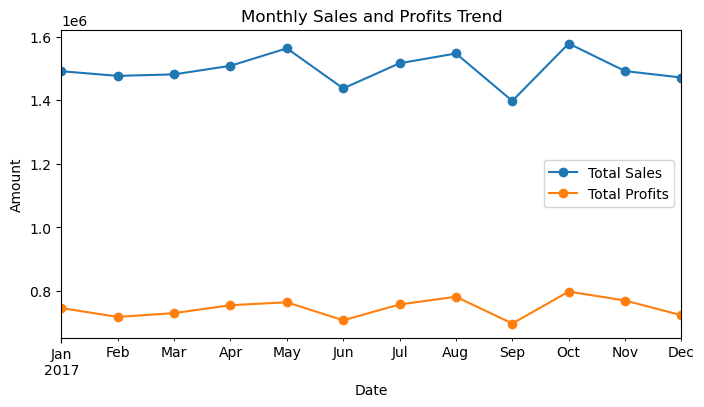

In [37]:
# Resampling data by month and visualize trends
monthly_data = df.resample('M').agg({'list_price': 'sum', 'profit': 'sum'})
plt.figure(figsize=(8, 4))

monthly_data['list_price'].plot(label='Total Sales', linestyle='-', marker='o')
monthly_data['profit'].plot(label='Total Profits', linestyle='-', marker='o')

plt.title('Monthly Sales and Profits Trend')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [38]:
print('transaction_date' in df.columns)

False


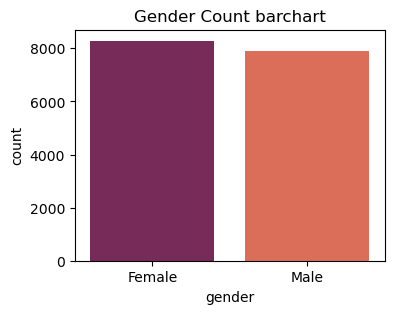

In [39]:
plt.figure(figsize=(4, 3))
sns.countplot(x = 'gender', data = df, palette = 'rocket')
plt.title('Gender Count barchart')
plt.savefig('gender_count.png')
plt.show()

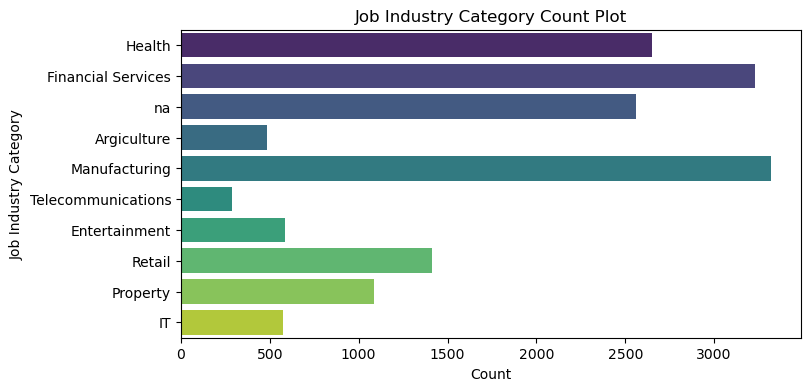

In [40]:
plt.figure(figsize=(8, 4))
sns.countplot(y='job_industry_category', data=df, palette='viridis')
plt.title('Job Industry Category Count Plot')
plt.xlabel('Count')
plt.ylabel('Job Industry Category')
plt.savefig('job_industry_alternative.png')
plt.show()

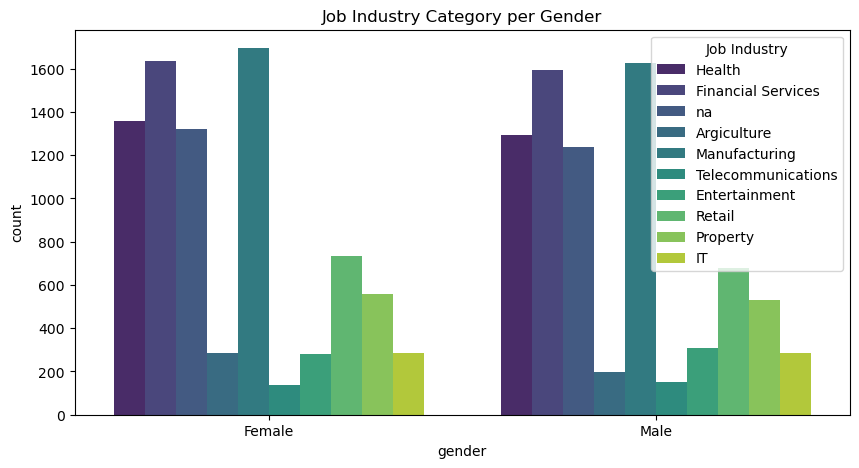

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df, hue='job_industry_category', palette ='viridis',order = df['gender'].value_counts().index)
plt.legend(title='Job Industry', loc='upper right')
plt.title('Job Industry Category per Gender')
plt.savefig('job_industry-gender_original.png')
plt.show()

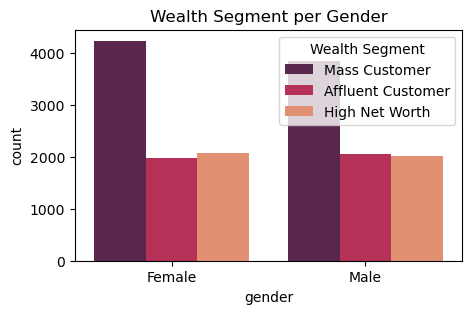

In [42]:
plt.figure(figsize = (5,3))
sns.countplot(x='gender', data=df, hue='wealth_segment', palette= 'rocket')
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment per Gender')
plt.savefig('wealth_segment-gender.png')
plt.show()

<Figure size 1600x800 with 0 Axes>

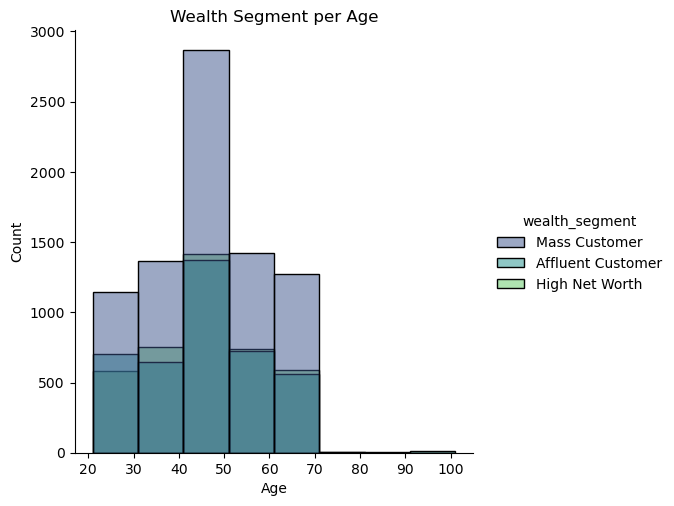

In [43]:
plt.figure(figsize = (16,8))
sns.displot(x='Age', binwidth=10, data=df, hue='wealth_segment', palette ='viridis')
plt.title('Wealth Segment per Age')
plt.savefig('wealth_segment_age.png')
plt.show()

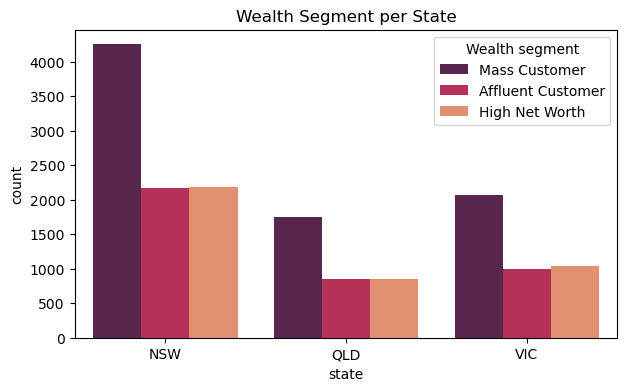

In [44]:
plt.figure(figsize = (7,4))
sns.countplot(x='state', data=df, hue='wealth_segment', palette = 'rocket')
plt.legend(title='Wealth segment', loc='upper right')
plt.title('Wealth Segment per State')
plt.savefig('wealth_segment-state.png')
plt.show()

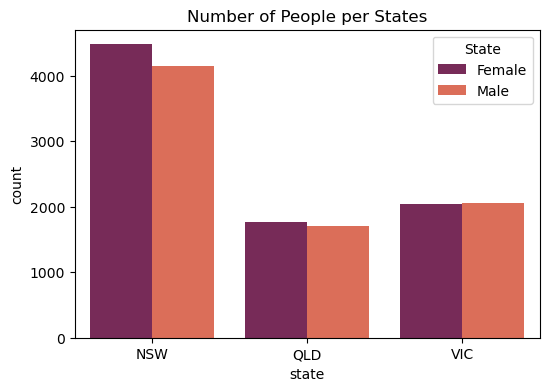

In [45]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'state', data = df, hue = 'gender',palette ='rocket')
plt.legend(title='State', loc='upper right')
plt.title('Number of People per States')
plt.savefig('gender-state_original.png')
plt.show()

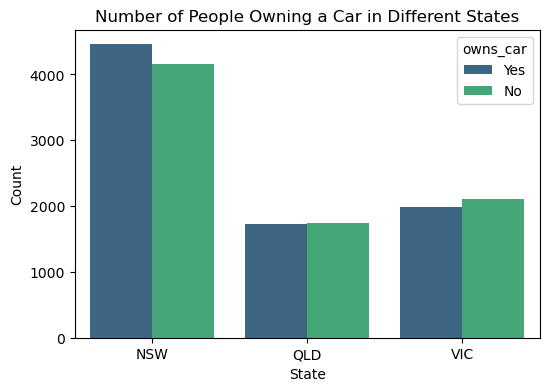

In [46]:
plt.figure(figsize=(6, 4))
sns.countplot(x='state', hue='owns_car', data=df, palette='viridis')
plt.title('Number of People Owning a Car in Different States')
plt.xlabel('State')
plt.ylabel('Count')
plt.savefig('car_ownership_by_state.png')
plt.show()

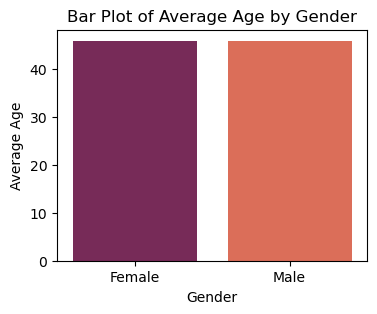

In [47]:
plt.figure(figsize=(4, 3))
sns.barplot(x='gender', y='Age', data=df, palette='rocket', errorbar=None)
plt.title('Bar Plot of Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.savefig('age_bar_plot.png')
plt.show()

In [48]:
#data analysis on the new customer list
df_newcust = df2
df_newcust

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,7/12/1957,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,3/22/1970,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,8/28/1974,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1/28/1979,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,9/21/1965,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,10/7/1959,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000
996,Burk,Wortley,Male,22,10/17/2001,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000
997,Melloney,Temby,Female,17,10/5/1954,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000
998,Dickie,Cubbini,Male,30,12/17/1952,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000


In [49]:
df_newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                1000 non-null   object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [50]:
df_newcust.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [51]:
#Dropping NA Values
df_newcust = df_newcust.dropna()

In [52]:
#Drop Duplicates
dfn = df_newcust.drop_duplicates()

In [53]:
dfn.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [54]:
dfn['new_customer_id'] = dfn.index

In [55]:
dfn['DOB'] = pd.to_datetime(dfn['DOB'], errors='coerce')

In [56]:
dfn.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Rank                                            int64
Value                                         float64
new_customer_id             

In [57]:
dfn['DOB'] = dfn['DOB'].apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')

In [58]:
dfn['DOB'].astype('datetime64')

0     1957-07-12
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
995   1959-10-07
996   2001-10-17
997   1954-10-05
998   1952-12-17
999   1955-10-02
Name: DOB, Length: 852, dtype: datetime64[ns]

In [59]:
dfn.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
new_customer_id                        0
dtype: int64

In [60]:
dfn['DOB'] = dfn['DOB'].fillna(dfn['DOB'].mode())

In [61]:
ref_date2 = dt.datetime.now()
dfn['Age'] = dfn['DOB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date2, freq = 'Y')) if str(x) else None)

In [62]:
dfn

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,new_customer_id,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,0,66
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,1,53
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,2,49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,3,44
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,4,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000,995,64
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,996,22
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000,997,69
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000,998,71


In [63]:
dfn = dfn[dfn.Age < 100]

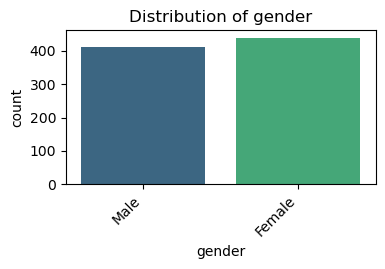

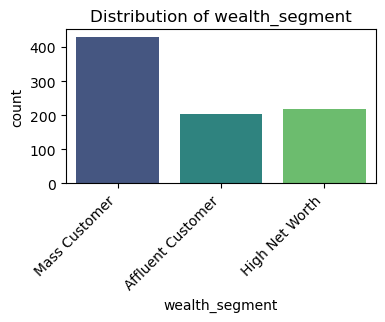

In [64]:
categorical_features = ['gender', 'wealth_segment']
for feature in categorical_features:
    plt.figure(figsize=(4, 2))
    sns.countplot(x=feature, data=dfn, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

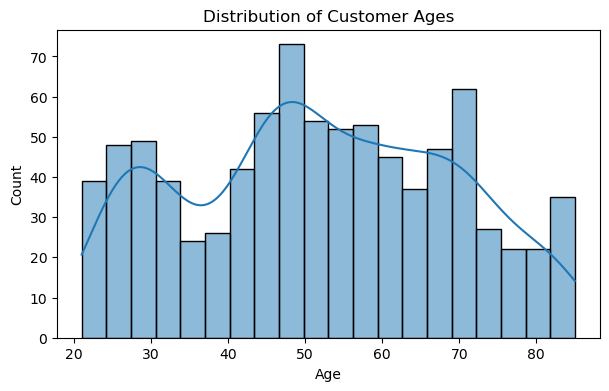

In [65]:
# Feature Engineering
dfn['Age'] = (pd.to_datetime('today') - pd.to_datetime(dfn['DOB'])).astype('<m8[Y]')
plt.figure(figsize=(7, 4))
sns.histplot(dfn['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.show()

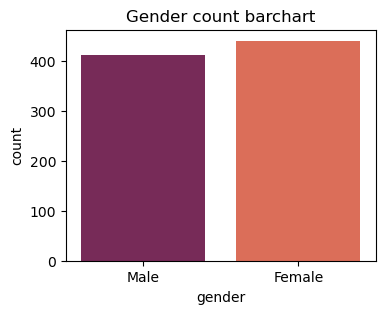

In [66]:
plt.figure(figsize=(4, 3))
sns.countplot(x = 'gender', data = dfn, palette = 'rocket')
plt.title('Gender count barchart')
plt.savefig('gender_count.png')
plt.show()

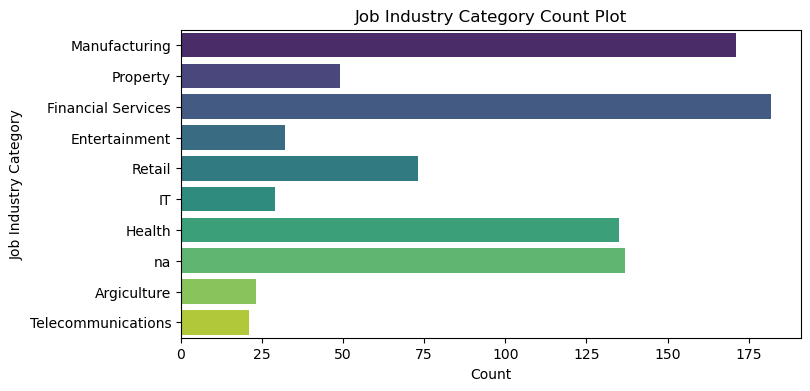

In [67]:
plt.figure(figsize=(8, 4))
sns.countplot(y='job_industry_category', data=dfn, palette='viridis')
plt.title('Job Industry Category Count Plot')
plt.xlabel('Count')
plt.ylabel('Job Industry Category')
plt.savefig('job_industry_alternative.png')
plt.show()

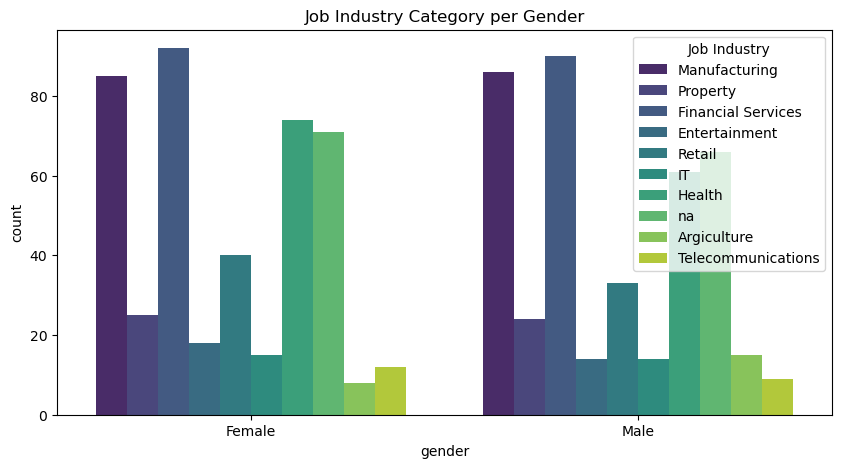

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=dfn, hue='job_industry_category', palette ='viridis',order = dfn['gender'].value_counts().index)
plt.legend(title='Job Industry', loc='upper right')
plt.title('Job Industry Category per Gender')
plt.savefig('job_industry-gender_original.png')
plt.show()

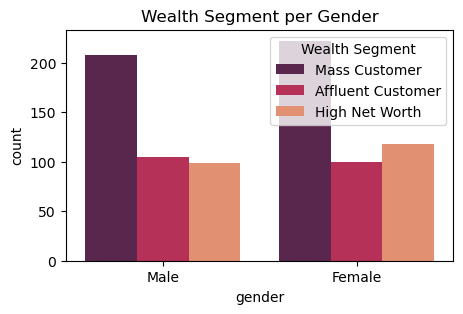

In [69]:
plt.figure(figsize = (5,3))
sns.countplot(x='gender', data=dfn, hue='wealth_segment', palette= 'rocket')
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment per Gender')
plt.savefig('wealth_segment-gender.png')
plt.show()


<Figure size 800x200 with 0 Axes>

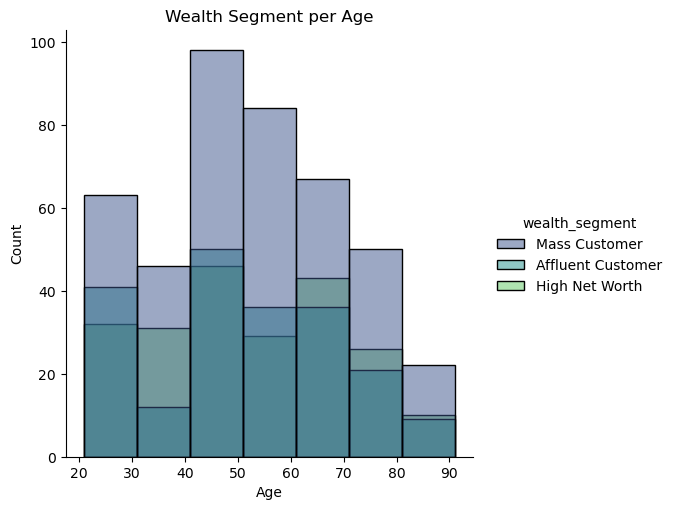

In [70]:
plt.figure(figsize = (8,2))
sns.displot(x='Age', binwidth=10, data=dfn, hue='wealth_segment', palette ='viridis')
plt.title('Wealth Segment per Age')
plt.savefig('wealth_segment_age.png')
plt.show()

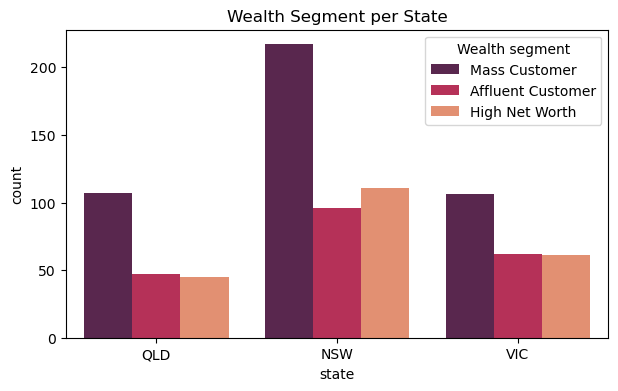

In [71]:
plt.figure(figsize = (7,4))
sns.countplot(x='state', data=dfn, hue='wealth_segment', palette = 'rocket')
plt.legend(title='Wealth segment', loc='upper right')
plt.title('Wealth Segment per State')
plt.savefig('wealth_segment-state.png')
plt.show()

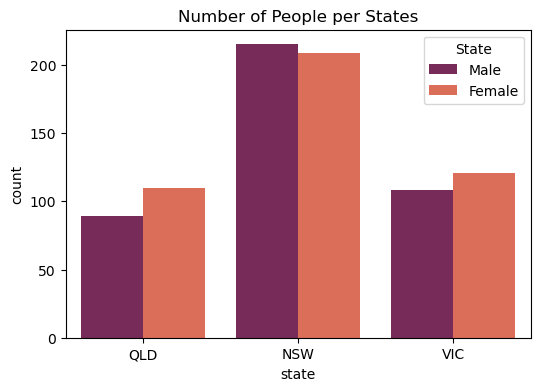

In [72]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'state', data = dfn, hue = 'gender',palette ='rocket')
plt.legend(title='State', loc='upper right')
plt.title('Number of People per States')
plt.savefig('gender-state_original.png')
plt.show()


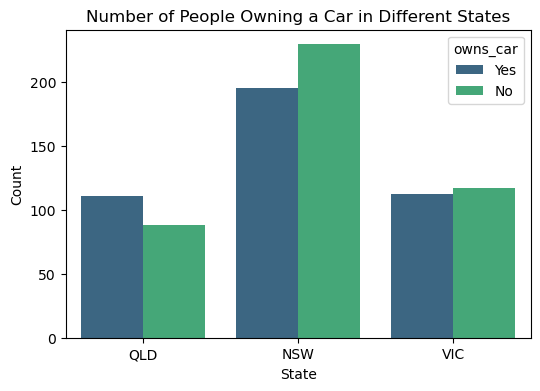

In [73]:
plt.figure(figsize=(6, 4))
sns.countplot(x='state', hue='owns_car', data=dfn, palette='viridis')
plt.title('Number of People Owning a Car in Different States')
plt.xlabel('State')
plt.ylabel('Count')
plt.savefig('car_ownership_by_state.png')
plt.show()


In [75]:
#print the final file to excel ready to be used as a data source for dashboard
dfn.to_excel('./Target_data.xlsx', sheet_name='target_data', index=False)